In [1]:
import os
import pickle
import pystan
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import multiprocessing
from scipy.special import expit
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [2]:
multiprocessing.set_start_method("fork")
sns.set()  # Nice plot aesthetic

In [3]:
bkp_folder = 'bkp'
os.makedirs(bkp_folder, exist_ok=True)

In [4]:
# Set seed
np.random.seed(123)

# Generate data

In [5]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)


x = np.linspace(0, 10, 100)

# Observations and noise
y = f(x)
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

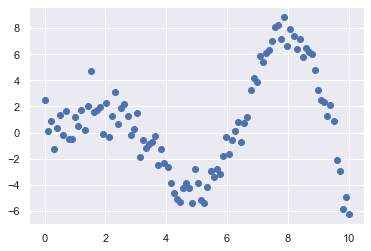

In [6]:
plt.scatter(x, y)
plt.show()

# Using Scikit-learn

## Example from the doc
https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

In [7]:
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

X = np.atleast_2d(x).T
# Fit to data using Maximum Likelihood Estimation of the parameters
fit = gp.fit(X, y)

x_plot = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x_plot, return_std=True)

# Create "samples of functions"
y_samples = gp.sample_y(x_plot, 10)

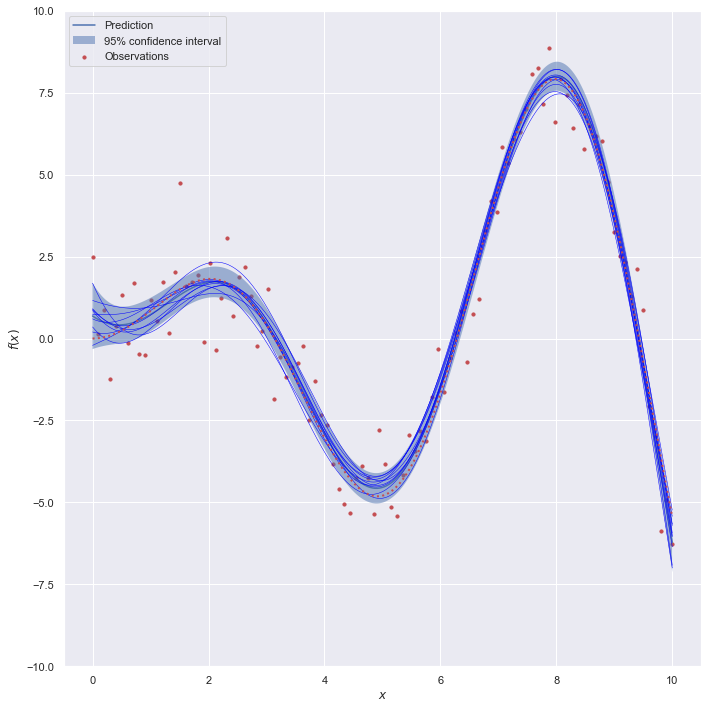

In [8]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure(figsize=(10, 10))

plt.scatter(x, y, color='r', s=10, label='Observations')
plt.plot(x_plot, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x_plot, x_plot[::-1]]),
         np.concatenate([y_pred - 1.96 * sigma,
                        (y_pred + 1.96 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 10)
plt.legend(loc='upper left')

plt.plot(x_plot, y_samples, lw=0.5, color='blue')

plt.plot(x_plot, f(x_plot), 'r:', label=r'$f(x) = x\,\sin(x)$', lw=2)

plt.tight_layout()

plt.show()

## Simplified

In [9]:
kernel = RBF()

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel,
                              n_restarts_optimizer=0,
                              alpha=1)

X = np.atleast_2d(x).T

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

x_plot = np.linspace(0, 10, 1000)

X_plot = np.atleast_2d(x_plot).T

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X_plot, return_std=True)

# Create "samples of functions"
y_samples = gp.sample_y(X_plot, 10)

In [10]:
gp.get_params()

{'alpha': 1,
 'copy_X_train': True,
 'kernel__length_scale': 1.0,
 'kernel__length_scale_bounds': (1e-05, 100000.0),
 'kernel': RBF(length_scale=1),
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

In [11]:
gp.kernel_.get_params()

{'length_scale': 0.8127408578507962, 'length_scale_bounds': (1e-05, 100000.0)}

In [12]:
y_pred.shape

(1000,)

In [13]:
x_plot.shape

(1000,)

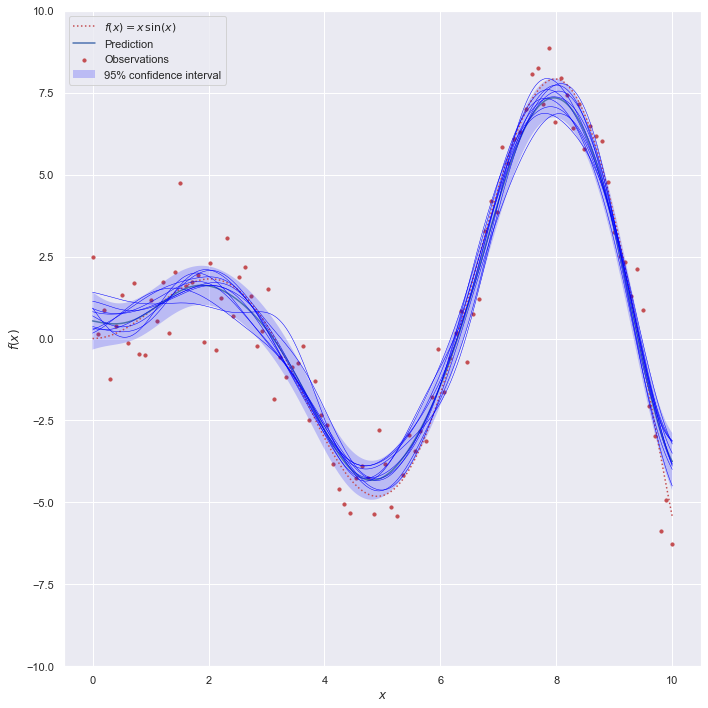

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(x_plot, f(x_plot), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.scatter(x, y, color='r', s=10, label='Observations')
plt.plot(x_plot, y_pred, 'b-', label='Prediction')
plt.fill_between(x_plot, y_pred + 1.96 * sigma, y_pred - 1.96 * sigma,
                 alpha=.2, fc='blue', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 10)
plt.legend(loc='upper left')

plt.plot(x_plot, y_samples, lw=0.5, color='blue')

plt.tight_layout()
plt.show()

# References

http://krasserm.github.io/2018/03/19/gaussian-processes/

https://www.youtube.com/watch?v=132s2B-mzBg

https://www.youtube.com/watch?v=92-98SYOdlY

https://mc-stan.org/docs/2_19/stan-users-guide/fit-gp-section.html

https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

https://betanalpha.github.io/assets/case_studies/gaussian_processes.html